# Dataset Ministerio del Interior Aprendidos y Detenidos Ecuador

## Integrantes

- Silvana Báez
- Gabriel Cisneros
- Lenin Falconí
- Jorge Miño
- Mario Moreno
- Jonathan Zea

## Objetivo:

- Analizar el dataset, sus características y valores
- Realizar una limpieza del dataset
- Disminuir el sesgo en el dataset

## Lectura del Dataset

In [50]:
import os
import pandas as pd

data_path = os.path.join(os.getcwd(), 'data/mdi_detenidos-aprehendidos_pm_2019_2024.xlsx')
df = pd.read_excel(data_path, sheet_name='1')
df.shape

(489847, 35)

El dataset original contiene 489847 filas y 35 columnas. A continuación, se presentan las primeras 5 filas

In [51]:
df.head()

,codigo_iccs,tipo,estado_civil,estatus_migratorio,edad,sexo,genero,nacionalidad,autoidentificacion_etnica,nivel_de_instruccion,...,codigo_parroquia,nombre_distrito,nombre_circuito,nombre_subcircuito,nombre_provincia,nombre_canton,nombre_parroquia,presunta_infraccion,latitud,longitud
0,SIN_DATO,DETENIDO,SOLTERO/A,SE DESCONOCE,50,HOMBRE,MASCULINO,ECUATORIANO,AFROECUATORIANO/A AFRODESCENDIENTE,SE DESCONOCE,...,'000000,MAR TERRITORIAL,MAR TERRITORIAL,MAR TERRITORIAL,MAR TERRITORIAL,MAR TERRITORIAL,MAR TERRITORIAL,BOLETAS,'0.94804252190900884,'-79.6480999768429001
1,010102.04,DETENIDO,SOLTERO/A,SE DESCONOCE,47,HOMBRE,MASCULINO,ECUATORIANO,AFROECUATORIANO/A AFRODESCENDIENTE,NO APLICA,...,'000000,MAR TERRITORIAL,MAR TERRITORIAL,MAR TERRITORIAL,MAR TERRITORIAL,MAR TERRITORIAL,MAR TERRITORIAL,DELITOS CONTRA LA INTEGRIDAD SEXUAL Y REPRODUC...,'0.981916698618488071,'-79.6465283632278584
2,4011,APREHENDIDO,SOLTERO/A,NO APLICA,20,HOMBRE,MASCULINO,ECUATORIANO,MESTIZO/A,NO APLICA,...,'000000,MAR TERRITORIAL,MAR TERRITORIAL,MAR TERRITORIAL,MAR TERRITORIAL,MAR TERRITORIAL,MAR TERRITORIAL,DELITOS CONTRA EL DERECHO A LA PROPIEDAD,'-2.22342217152850585,'-79.9236059188842916
3,020721.02,APREHENDIDO,SOLTERO/A,SE DESCONOCE,31,HOMBRE,NO APLICA,ECUATORIANO,MESTIZO/A,SE DESCONOCE,...,'030450,LA TRONCAL,TRONCAL CENTRO,TRONCAL CENTRO 1,CAÑAR,LA TRONCAL,LA TRONCAL,CONTRAVENCIONES DE TRÁNSITO,'-2.46668633783548952,'-79.2915152305547366
4,4011,APREHENDIDO,SOLTERO/A,NO APLICA,27,HOMBRE,MASCULINO,ECUATORIANO,MESTIZO/A,NO APLICA,...,'000000,MAR TERRITORIAL,MAR TERRITORIAL,MAR TERRITORIAL,MAR TERRITORIAL,MAR TERRITORIAL,MAR TERRITORIAL,DELITOS CONTRA EL DERECHO A LA PROPIEDAD,'-2.22342217152850585,'-79.9236059188842916


Se describe los valores más frecuentes presentes en el dataset

In [52]:
df.describe().transpose()

,count,unique,top,freq
codigo_iccs,489847,233,SIN_DATO,174941
tipo,489847,2,APREHENDIDO,349555
estado_civil,489847,11,SOLTERO/A,333776
estatus_migratorio,489847,5,NO APLICA,195575
edad,489847,97,24,20758
sexo,489847,3,HOMBRE,439791
genero,489847,8,MASCULINO,349597
nacionalidad,489847,110,ECUATORIANO,459664
autoidentificacion_etnica,489847,41,MESTIZO/A,403351
nivel_de_instruccion,489847,18,SE DESCONOCE,144391


El dataset original dispone de 81 distintas categorías de `presunta_infraccion`. Esta variable tiene que ver con el delito/infracción cometida por la persona

In [53]:
len(set(df['presunta_infraccion']))  # 1572

81

Top 5 de delitos presentes en el dataset completo

In [54]:
df.presunta_infraccion.value_counts().sort_values(ascending=False).head(5)

presunta_infraccion
DELITOS CONTRA EL DERECHO A LA PROPIEDAD                                                         86007
BOLETAS                                                                                          74107
DELITOS POR LA PRODUCCIÓN O TRÁFICO ILÍCITO DE SUSTANCIAS CATALOGADAS SUJETAS A FISCALIZACIÓN    68484
CONTRAVENCIONES DE TRÁNSITO                                                                      41550
CONTRAVENCIÓN DE VIOLENCIA CONTRA LA MUJER O MIEMBROS DEL NÚCLEO FAMILIAR                        28832
Name: count, dtype: int64

La variable `fecha_detencion_aprehension` contiene datos de distinta naturaleza (`str`, `date`). Por esta razón, se convierten todos los datos a formato `datetime` para poder hacer operaciones en el tiempo.

In [55]:
df['fecha_detencion_aprehension'] = df['fecha_detencion_aprehension'].apply(lambda x: pd.to_datetime(x, errors='coerce'))
df.dtypes

codigo_iccs                            object
tipo                                   object
estado_civil                           object
estatus_migratorio                     object
edad                                   object
sexo                                   object
genero                                 object
nacionalidad                           object
autoidentificacion_etnica              object
nivel_de_instruccion                   object
condicion                              object
movilizacion                           object
tipo_arma                              object
arma                                   object
fecha_detencion_aprehension    datetime64[ns]
hora_detencion_aprehension             object
lugar                                  object
tipo_lugar                             object
nombre_zona                            object
nombre_subzona                         object
codigo_distrito                        object
codigo_circuito                   

La variable `tipo` contiene sólo dos categorías

In [56]:
df.tipo.value_counts()

tipo
APREHENDIDO    349555
DETENIDO       140292
Name: count, dtype: int64

Se observa que la cantidad de registros varía con el año. Además, el año 1970 hace referencia a registros cuya marca de tiempo es imprecisa, incorrecta o no existe

In [57]:
df['anio_detension_aprehension'] = df['fecha_detencion_aprehension'].dt.year
df.anio_detension_aprehension.value_counts().sort_index()

anio_detension_aprehension
1970.0    357636
2020.0       434
2021.0       428
2022.0       459
2023.0        45
2024.0     41510
Name: count, dtype: int64

Dado que el año 2024 presenta la segunda mayor cantidad de registros, se lo toma como base para el análisis posterior (i.e.) se descarta los demás años debido a las frecuencias no comparables y no explicadas por el *Ministerio del Interior*

In [58]:
df_2024 = df[df['anio_detension_aprehension'] == 2024]
df_2024.shape

(41510, 36)

In [59]:
df_2024.columns

Index(['codigo_iccs', 'tipo', 'estado_civil', 'estatus_migratorio', 'edad',
       'sexo', 'genero', 'nacionalidad', 'autoidentificacion_etnica',
       'nivel_de_instruccion', 'condicion', 'movilizacion', 'tipo_arma',
       'arma', 'fecha_detencion_aprehension', 'hora_detencion_aprehension',
       'lugar', 'tipo_lugar', 'nombre_zona', 'nombre_subzona',
       'codigo_distrito', 'codigo_circuito', 'codigo_subcircuito',
       'codigo_provincia', 'codigo_canton', 'codigo_parroquia',
       'nombre_distrito', 'nombre_circuito', 'nombre_subcircuito',
       'nombre_provincia', 'nombre_canton', 'nombre_parroquia',
       'presunta_infraccion', 'latitud', 'longitud',
       'anio_detension_aprehension'],
      dtype='object')

## Análisis de varias columnas

se procede a evaluar los valores registrados en varias variables de interés

In [60]:
df_2024.estatus_migratorio.value_counts()

estatus_migratorio
NO APLICA       19666
SE DESCONOCE    14338
REGULAR          6919
IRREGULAR         587
Name: count, dtype: int64

## Edad

Se descartan los casos en que la edad no está definida (i.e. `SIN_DATO`)ya que su cantidad no es representativa para el tamaño del dataset

In [61]:
# df_2024 = df_2024.drop(columns=['codigo_iccs', 'fecha', 'presunta_infraccion'])
df_2024 = df_2024[df_2024['edad']!="SIN_DATO"]
df_2024.shape

(40976, 36)

## Limpieza variable Genero

Se observa que inicialmente la variable `genero` contiene el valor `NO APLICA`. Sin embargo, al correlacionar con la variable `sexo`, parece que los registradores utilizaron el valor `NO APLICA` cuando la persona definió su sexo como `HOMBRE` o `MUJER`. De ahí que esta variable se redefine consultando el valor del `sexo`

In [62]:
df_2024['genero'].value_counts()

genero
MASCULINO          35470
FEMENINO            4300
NO APLICA           1144
TRANS MASCULINO       29
TRANS FEMENINA        17
TRANSEXUAL            12
NO BINARIO             4
Name: count, dtype: int64

In [63]:
df_2024.loc[(df_2024['genero'] == 'NO APLICA') & (df_2024['sexo'] == 'HOMBRE'), 'genero'] = 'MASCULINO'
df_2024.loc[(df_2024['genero'] == 'NO APLICA') & (df_2024['sexo'] == 'MUJER'), 'genero'] = 'FEMENINO'

In [64]:
df_2024['genero'].value_counts()

genero
MASCULINO          36476
FEMENINO            4438
TRANS MASCULINO       29
TRANS FEMENINA        17
TRANSEXUAL            12
NO BINARIO             4
Name: count, dtype: int64

In [65]:
df_2024['estado_civil'].value_counts()

estado_civil
SOLTERO/A         30654
CASADO/A           6189
DIVORCIADO/A       2777
SE DESCONOCE        842
UNIÓN DE HECHO      302
VIUDO/A             212
Name: count, dtype: int64

In [66]:
set(df_2024['nacionalidad'])

{'ALEMÁN',
 'ARGENTINO',
 'BELGA',
 'BELICENO',
 'BOLIVIANO',
 'CHILENO',
 'CHINO',
 'COLOMBIANO',
 'CUBANO',
 'DOMINICANO',
 'ECUATOGUINEANO',
 'ECUATORIANO',
 'ESPAÑOL',
 'ESTADOUNIDENCE',
 'ITALIANO',
 'MEXICANO',
 'PARAGUAYO',
 'PERUANO',
 'POLACO',
 'RUSO',
 'SALVADOREÑO',
 'SE DESCONOCE',
 'SURCOREANO',
 'VENEZOLANO',
 'VIETNAMITA'}

Al respecto de la variable `nacionalidad`, y considerando que la gran mayoría ($\approx 97\%$) del dataset contiene información de ecuatorianos, con apenas un $3\%$ de inmigrantes, se considera que el análisis se realizará sólo sobre población de origen *ecuatoriana*

In [67]:
df_2024[df_2024['nacionalidad']=="ECUATORIANO"]
df_2024.shape

(40976, 36)

No existe un criterio que explique los valores presentes en la variable `estatus_migratorio`, por lo que esta variable se descarta del análisis

In [68]:
df_2024['estatus_migratorio'].value_counts()

estatus_migratorio
NO APLICA       19554
SE DESCONOCE    14014
REGULAR          6899
IRREGULAR         509
Name: count, dtype: int64

No existe un criterio que explique los valores presentes en la variable `estatus_migratorio`, por lo que esta variable se descarta del análisis

In [69]:
df_2024['nivel_de_instruccion'].value_counts()

nivel_de_instruccion
SE DESCONOCE                                   15741
NO APLICA                                      13235
BACHILLERATO                                    7586
EDUCACIÓN GENERAL BÁSICA                        2654
TERCER NIVEL TÉCNICO-TECNOLÓGICO Y DE GRADO      915
EDUCACIÓN INICIAL                                531
CUARTO NIVEL O DE POSGRADO                       314
Name: count, dtype: int64

Se realiza un histograma de la variable `edad` que muestra la distribución de las edades en el dataset.

<Axes: >

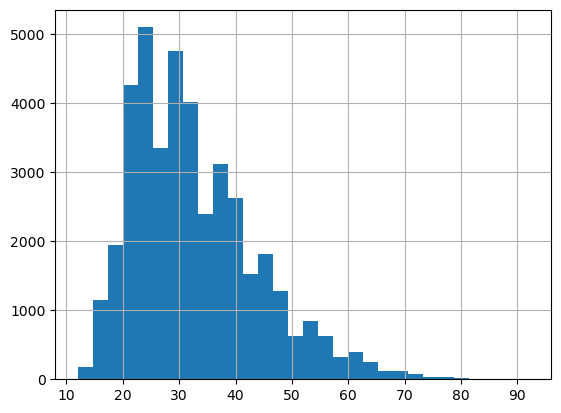

In [70]:
df_2024.edad.hist(bins=30)

In [71]:
print(f"Edad mínima: {df_2024.edad.min()}   Edad máxima: {df_2024.edad.max()}   Edad promedio: {df_2024.edad.mean():.2f}")
# df_2024.edad.min()

Edad mínima: 12   Edad máxima: 92   Edad promedio: 32.56


<Axes: xlabel='genero', ylabel='edad'>

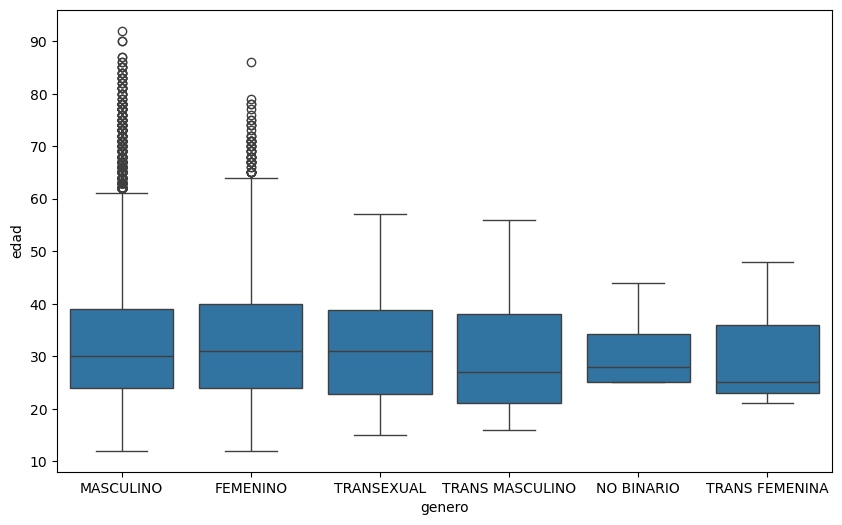

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns   

plt.figure(figsize=(10, 6))
sns.boxplot(x='genero', y='edad', data=df_2024)

<Axes: xlabel='tipo', ylabel='edad'>

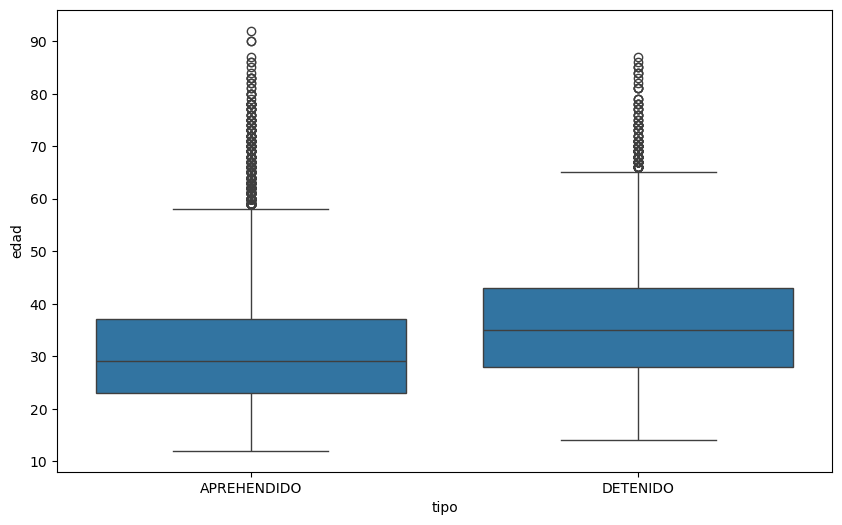

In [73]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='tipo', y='edad', data=df_2024)

No existe un criterio que explique los valores presentes en la variable `condicion`, por lo que esta variable se descarta del análisis

In [74]:
df_2024['condicion'].value_counts()

condicion
NORMAL                                                                                                                   31109
ALIENTO A LICOR                                                                                                           7697
SIN_DATO                                                                                                                  1749
ALIENTO A LICOR, NORMAL                                                                                                    180
BAJO LOS EFECTOS DE SUSTANCIAS ESTUPEFACIENTES, PSICOTRÓPICAS O PREPARADOS QUE LAS CONTENGAN                               158
ALIENTO A LICOR, BAJO LOS EFECTOS DE SUSTANCIAS ESTUPEFACIENTES, PSICOTRÓPICAS O PREPARADOS QUE LAS CONTENGAN               69
BAJO LOS EFECTOS DE SUSTANCIAS ESTUPEFACIENTES, PSICOTRÓPICAS O PREPARADOS QUE LAS CONTENGAN, NORMAL                        11
ALIENTO A LICOR, BAJO LOS EFECTOS DE SUSTANCIAS ESTUPEFACIENTES, PSICOTRÓPICAS O PREPARADOS QUE LAS C

No existe un criterio que explique los valores presentes en la variable `movilizacion`, por lo que esta variable se descarta del análisis

In [75]:
df_2024['movilizacion'].value_counts()

movilizacion
A PIE           22105
NO APLICA        5093
AUTOMÓVIL        4690
MOTOCICLETA      4001
SE DESCONOCE     3015
CAMIONETA        1142
BUS               361
TAXI              346
BICICLETA          97
LANCHA             79
ACÉMILAS           29
BOTE               15
CUADRÓN             3
Name: count, dtype: int64

No existe un criterio que explique los valores presentes en la variable `lugar`, por lo que esta variable se descarta del análisis

In [76]:
df_2024['lugar'].value_counts()

lugar
VÍA PÚBLICA                        25303
ESPACIO PRIVADO                     6754
CASA/VILLA                          3726
PARQUE Y PLAZA                       415
POLICÍA NACIONAL                     294
                                   ...  
RANCHO                                 1
CRS MASCULINO-EL CONDADO               1
CENTRO DE DETENCIÓN PROVISIONAL        1
CONSEJOS                               1
CPPL MASCULINO-AZOGUES                 1
Name: count, Length: 183, dtype: int64

In [77]:
df_2024['tipo_lugar'].value_counts()

tipo_lugar
ÁREA DE ACCESO PÚBLICO                                26496
ÁREA PRIVADA                                           6753
VIVIENDA/ALOJAMIENTO                                   4300
ÁREAS DEDICADAS AL COMERCIO                             714
ENTIDADES PUBLICAS                                      443
TRANSPORTE                                              412
CENTRO DE REHABILITACIÓN SOCIAL (CRS)                   381
UNIDADES DE REACCIÓN Y EMERGENCIA                       347
INSTITUCIONES EDUCATIVAS                                322
LUGARES QUE PRESTAN SERVICIOS                           227
CENTROS DE DIVERSIÓN                                    171
INSTITUCIONES DE SALUD                                  162
CENTRO DE PRIVACIÓN PROVISIONAL DE LIBERTAD (CPPL)      118
ENTIDADES FINANCIERAS                                    51
ZONA DE INSPECCIÓN                                       42
UNIDADES DE ASEGURAMIENTO TRANSITORIO (UAT)              21
CENTRO DE ADOLESCENTES INFRAC

In [78]:
top_3_tipo_lugar = df_2024['tipo_lugar'].value_counts().nlargest(3).index
df_2024['tipo_lugar'] = df_2024['tipo_lugar'].apply(lambda x: x if x in top_3_tipo_lugar else 'OTROS')

In [79]:
df_2024['tipo_lugar'].value_counts()

tipo_lugar
ÁREA DE ACCESO PÚBLICO    26496
ÁREA PRIVADA               6753
VIVIENDA/ALOJAMIENTO       4300
OTROS                      3427
Name: count, dtype: int64

En la descripción en el dataset la variable `nombre_provincia` presenta más categorías que provincias existen en el Ecuador

In [80]:
len(set(df_2024['nombre_provincia']))

25

## Removiendo columnas no necesarias

In [81]:
df_out = df_2024.copy()
cols2drop = ['codigo_iccs', 
             'estatus_migratorio', 
             'sexo', 
             'nacionalidad', 
             'autoidentificacion_etnica', 
             'nivel_de_instruccion', 
             'condicion', 
             'movilizacion', 
             'lugar',
             'tipo_arma',
             'arma',
             'fecha_detencion_aprehension',
             'anio_detension_aprehension',
             'hora_detencion_aprehension',
             'nombre_zona',
             'nombre_subzona',
             'codigo_distrito',
             'nombre_distrito',
             'codigo_canton',
             'codigo_circuito',
             'codigo_subcircuito',
             'nombre_circuito',
             'nombre_subcircuito',
             'nombre_canton',
             'nombre_parroquia',
             'codigo_parroquia',
             'latitud',
             'longitud',]
len(cols2drop)

28

In [82]:
df_out = df_out.drop(columns=cols2drop)
df_out.shape

(40976, 8)

In [83]:
df_out['codigo_provincia'] = df_out['codigo_provincia'].apply(lambda x: str(x).replace("'", "").zfill(2))

In [84]:
df_out.sample(10)

,tipo,estado_civil,edad,genero,tipo_lugar,codigo_provincia,nombre_provincia,presunta_infraccion
38274,APREHENDIDO,DIVORCIADO/A,41,MASCULINO,ÁREA DE ACCESO PÚBLICO,14,MORONA SANTIAGO,DELITOS CULPOSOS DE TRÁNSITO
10813,APREHENDIDO,SE DESCONOCE,46,MASCULINO,OTROS,24,SANTA ELENA,DELITOS CONTRA EL DERECHO A LA PROPIEDAD
12613,APREHENDIDO,CASADO/A,53,MASCULINO,ÁREA DE ACCESO PÚBLICO,13,MANABÍ,DELITOS CONTRA LA SEGURIDAD PÚBLICA
35255,APREHENDIDO,SOLTERO/A,19,MASCULINO,ÁREA DE ACCESO PÚBLICO,03,CAÑAR,CONTRAVENCIONES DE TRÁNSITO
16927,APREHENDIDO,SOLTERO/A,32,FEMENINO,ÁREA PRIVADA,17,PICHINCHA,DELITOS POR LA PRODUCCIÓN O TRÁFICO ILÍCITO DE...
32438,APREHENDIDO,SOLTERO/A,31,MASCULINO,ÁREA DE ACCESO PÚBLICO,07,EL ORO,CONTRAVENCIONES DE TRÁNSITO
41961,DETENIDO,SOLTERO/A,44,MASCULINO,ÁREA DE ACCESO PÚBLICO,09,GUAYAS,DELITOS CONTRA EL DERECHO A LA PROPIEDAD
27972,DETENIDO,CASADO/A,44,MASCULINO,ÁREA DE ACCESO PÚBLICO,09,GUAYAS,BOLETAS
40046,APREHENDIDO,SOLTERO/A,30,FEMENINO,ÁREA DE ACCESO PÚBLICO,24,SANTA ELENA,DELITOS CONTRA EL DERECHO A LA PROPIEDAD
16546,APREHENDIDO,SOLTERO/A,37,MASCULINO,ÁREA DE ACCESO PÚBLICO,11,LOJA,DELITOS CONTRA LA INVIOLABILIDAD DE LA VIDA


In [85]:
df_out['presunta_infraccion'].value_counts().sort_values(ascending=False).head(10)

presunta_infraccion
DELITOS CONTRA EL DERECHO A LA PROPIEDAD                                                         7141
BOLETAS                                                                                          6217
DELITOS POR LA PRODUCCIÓN O TRÁFICO ILÍCITO DE SUSTANCIAS CATALOGADAS SUJETAS A FISCALIZACIÓN    6214
DELITOS CONTRA LA SEGURIDAD PÚBLICA                                                              3410
CONTRAVENCIONES DE TRÁNSITO                                                                      3170
CONTRAVENCION DE VIOLENCIA CONTRA LA MUJER O MIEMBROS DEL NUCLEO FAMILIAR                        2507
DELITOS DE VIOLENCIA CONTRA LA MUJER O MIEMBROS DEL NÚCLEO FAMILIAR                              2071
DELITOS CONTRA LA EFICIENCIA DE LA ADMINISTRACIÓN PÚBLICA                                        1618
CONTRAVENCIONES                                                                                  1190
DELITOS CONTRA LA INTEGRIDAD SEXUAL Y REPRODUCTIVA            

In [86]:
# len(set(df_out['presunta_infraccion']))
df_out.describe().transpose()

,count,unique,top,freq
tipo,40976,2,APREHENDIDO,31010
estado_civil,40976,6,SOLTERO/A,30654
edad,40976,78,24,1730
genero,40976,6,MASCULINO,36476
tipo_lugar,40976,4,ÁREA DE ACCESO PÚBLICO,26496
codigo_provincia,40976,25,09,7966
nombre_provincia,40976,25,GUAYAS,7966
presunta_infraccion,40976,52,DELITOS CONTRA EL DERECHO A LA PROPIEDAD,7141


## Presunto Delito/Infracción

En el dataset final existen 52 valores distintos en `presunta_infraccion`. Se toma el top 10 de los más frecuentes y los demás se define como `OTROS`

In [87]:
top_10_infracciones = df_out['presunta_infraccion'].value_counts().nlargest(3).index
df_out['presunta_infraccion'] = df_out['presunta_infraccion'].apply(lambda x: x if x in top_10_infracciones else 'OTROS')
df_out['presunta_infraccion'].value_counts()

presunta_infraccion
OTROS                                                                                            21404
DELITOS CONTRA EL DERECHO A LA PROPIEDAD                                                          7141
BOLETAS                                                                                           6217
DELITOS POR LA PRODUCCIÓN O TRÁFICO ILÍCITO DE SUSTANCIAS CATALOGADAS SUJETAS A FISCALIZACIÓN     6214
Name: count, dtype: int64

<Axes: xlabel='edad', ylabel='presunta_infraccion'>

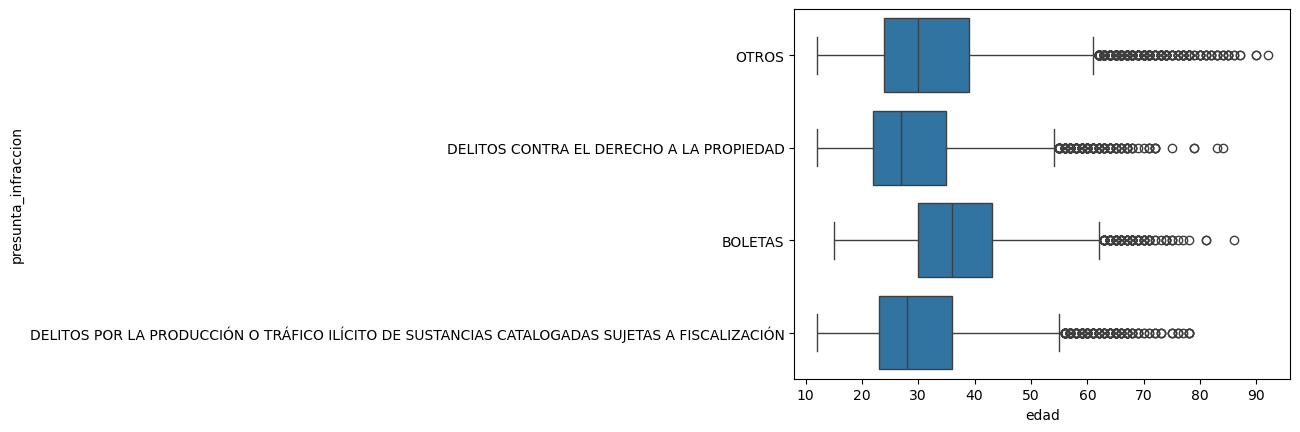

In [88]:
sns.boxplot(x='edad', y='presunta_infraccion', data=df_out)

In [89]:
df_out.to_csv('data/mdi_detenidos_2024_limpio.csv', index=False)

In [90]:
df_out.shape

(40976, 8)